In [49]:
%load_ext autoreload
%autoreload 2
from utils import *
import pickle
import matplotlib.pyplot as plt
from collections import Counter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
candidates_mapping = {
    0 : "Arthaud",
    1 : "Asselineau",
    2 : "Cheminade",
    3 : "Dupont-Aignan",
    4 : "Fillon",
    5 : "Hamon",
    6 : "Lassalle",
    7 : "Le Pen",
    8 : "Macron",
    9 : "Mélenchon",
    10 : "Poutou"
}

In [32]:
f = open("communities/v1/partition", "rb")
partition = pickle.load(f)
f.close()

In [33]:
f = open("communities/v1/nb_tweets_per_user", "rb")
nb_tweets_per_user = pickle.load(f)
f.close()
f = open("communities/v1/graph", "rb")
G = pickle.load(f)
f.close()

In [34]:
k = 4

In [35]:
values = list(partition.values())
# for each community, count number of users belonging to it
c = Counter(values)
# sort communities in descending order with respect to their number of users
communities_id_sorted = sorted(np.unique(values), key=c.get, reverse=True)

In [36]:
# create array where first column = community, second column = size of community
communities_counts = [(community_id, c[community_id]) for community_id in communities_id_sorted]
communities_counts = np.array(communities_counts)

In [37]:
top_communities = communities_counts[:k,0]

In [38]:
# remove parts of the graph that are unrelated to the k biggest communities
partition_filtered, G_filtered, nb_tweets_per_user_filtered = filter_graph(partition, G, \
                                                                         nb_tweets_per_user,\
                                                                         top_communities)

In [39]:
# compute new graph layout
pos = community_layout(G_filtered, partition_filtered)

/Users/lauranguyen/Documents/UPMC/M1/S2/PLDAC/PLDAC_TWITTER/community_graph.py:28: RuntimeWarning: divide by zero encountered in log
  _node_size = np.log(np.array([dict_node_size.get(node) for node in G.nodes()]))


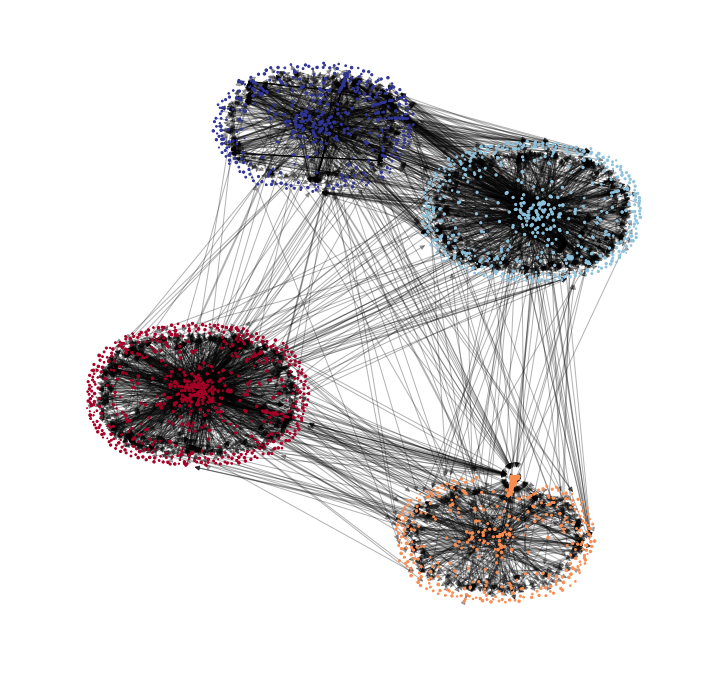

In [40]:
plot_community_graph(G_filtered, pos, partition_filtered, nb_tweets_per_user_filtered)

In [41]:
# create array out of partition_filtered
partition_filtered_array = np.array([(user_id, community) for (user_id, community) in partition_filtered.items()])

In [42]:
# create array out of nb_tweets_per_user
nb_tweets_filtered_array = np.array([(user_id, nb) for (user_id, nb) in nb_tweets_per_user_filtered.items()])

In [43]:
# element i of communities is the subarray of partition_filtered_array corresponding to the ith biggest community
communities = []
for i in range(k):
    com = partition_filtered_array[np.where(partition_filtered_array[:,1] == top_communities[i])]
    communities.append(com)

In [50]:
for i in range(k):
    # get users from ith biggest community
    users = communities[i][:,0]
    # compute average number of tweets among this community
    avg = np.mean(nb_tweets_filtered_array[np.where(np.in1d(nb_tweets_filtered_array[:,0], users))][:,1])
    tweets, candidates = get_tweets_candidates_from_users(tuple(users),10000)
    cand = np.argmax(np.sum(candidates, axis=0))
    print("Community {} - average number of tweets per user : {} - most mentioned candidate : {}"\
          .format(top_communities[i], avg, candidates_mapping[cand]))

Community 0 - average number of tweets per user : 301.51662049861494 - most mentioned candidate : Mélenchon
Community 6 - average number of tweets per user : 238.42930153321976 - most mentioned candidate : Macron
Community 8 - average number of tweets per user : 156.32562277580072 - most mentioned candidate : Le Pen
Community 2 - average number of tweets per user : 181.62020202020202 - most mentioned candidate : Fillon


In [18]:
top_communities

array([0, 6, 8, 2])

## Analysis of community 0

In [46]:
partition_0, G_0, nb_tweets_0 = filter_graph(partition, G, nb_tweets_per_user, [top_communities[0]])

In [51]:
pos_0 = community_layout(G_0, partition_0)

/Users/lauranguyen/Documents/UPMC/M1/S2/PLDAC/PLDAC_TWITTER/community_graph.py:28: RuntimeWarning: divide by zero encountered in log
  _node_size = np.log(np.array([dict_node_size.get(node) for node in G.nodes()]))


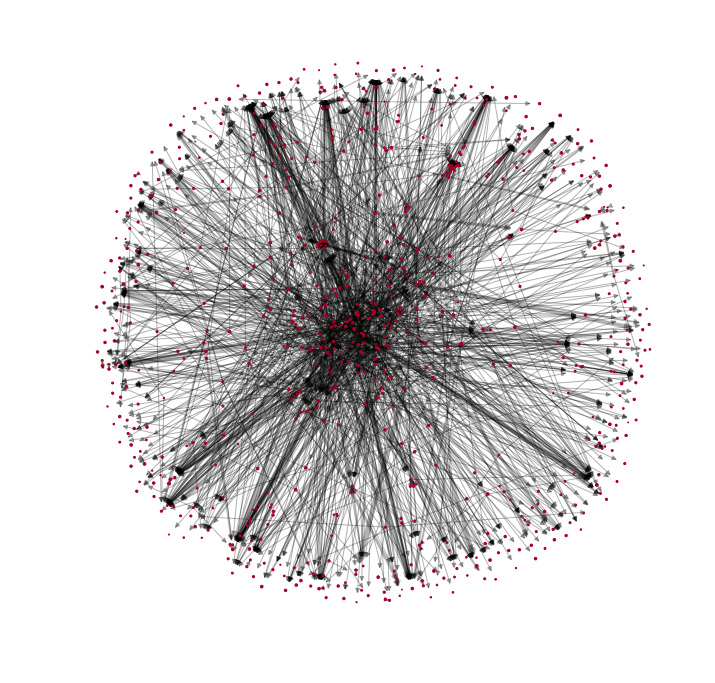

In [52]:
plot_community_graph(G_0, pos_0, partition_0, nb_tweets_0)

In [ ]:
users_0 = communities[i][:,0]
for u in users_0:
    tweets, candidates =